In [2]:
df = pd.read_csv("../data/poro_perm_data.csv", dtype=str)
df.head()


,Depth (ft),Porosity (%),Permeability (mD),Facies
0,1863.5,14.42755622,31.05321106,'overbanks'
1,2515,16.7335223,12.41260773,'channel'
2,1608,20.21113818,95.73555409,'crevasse splay'
3,201,0.399182377,21.32445482,'channel'
4,2580,14.53387864,53.69403685,'crevasse splay'


In [3]:
df["Facies"] = df["Facies"].str.replace("'", "")
df["Porosity (%)"] = pd.to_numeric(df["Porosity (%)"], errors="coerce")
df["Permeability (mD)"] = pd.to_numeric(df["Permeability (mD)"], errors="coerce")
df.head()


,Depth (ft),Porosity (%),Permeability (mD),Facies
0,1863.5,14.427556,31.053211,overbanks
1,2515,16.733522,12.412608,channel
2,1608,20.211138,95.735554,crevasse splay
3,201,0.399182,21.324455,channel
4,2580,14.533879,53.694037,crevasse splay


Matplotlib is building the font cache; this may take a moment.


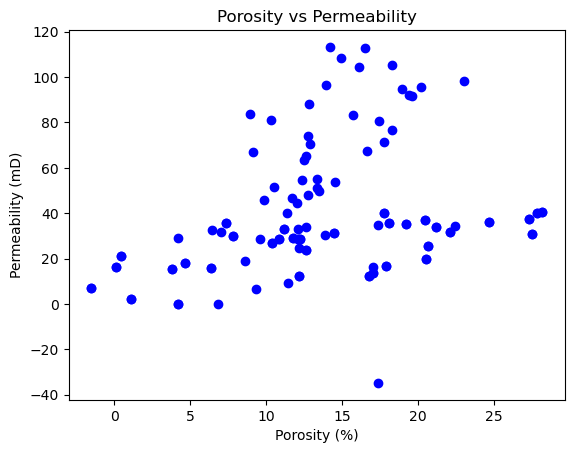

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df["Porosity (%)"], df["Permeability (mD)"], c="blue")
plt.xlabel("Porosity (%)")
plt.ylabel("Permeability (mD)")
plt.title("Porosity vs Permeability")
plt.show()


<Axes: xlabel='Porosity (%)', ylabel='Permeability (mD)'>

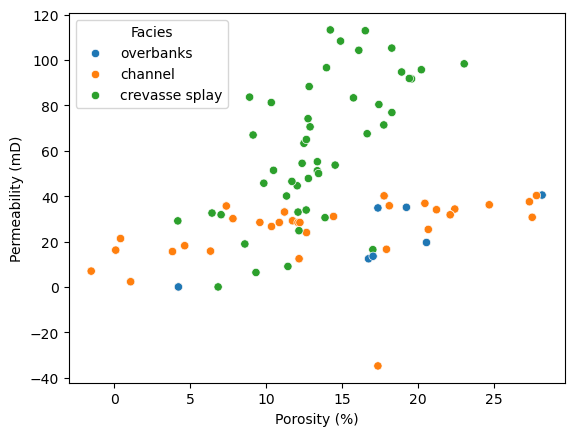

In [5]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="Porosity (%)",
    y="Permeability (mD)",
    hue="Facies"
)


In [6]:
# Remove rows where porosity or permeability are missing or negative
df = df.dropna(subset=["Porosity (%)", "Permeability (mD)"])
df = df[df["Porosity (%)"] >= 0]
df = df[df["Permeability (mD)"] > 0]

# Check remaining data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 122
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Depth (ft)         115 non-null    object 
 1   Porosity (%)       115 non-null    float64
 2   Permeability (mD)  115 non-null    float64
 3   Facies             115 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.5+ KB


In [7]:
# Clean and prepare dataset
import numpy as np

# Remove quotes in Facies
df["Facies"] = df["Facies"].str.replace("'", "").str.strip()

# Convert to numeric and handle errors
df["Porosity (%)"] = pd.to_numeric(df["Porosity (%)"], errors="coerce")
df["Permeability (mD)"] = pd.to_numeric(df["Permeability (mD)"], errors="coerce")
df["Depth (ft)"] = pd.to_numeric(df["Depth (ft)"], errors="coerce")

# Drop rows with missing key values or negative numbers
df = df.dropna(subset=["Porosity (%)", "Permeability (mD)"])
df = df[df["Porosity (%)"] >= 0]
df = df[df["Permeability (mD)"] > 0]

df.head()


,Depth (ft),Porosity (%),Permeability (mD),Facies
0,1863.5,14.427556,31.053211,overbanks
1,2515.0,16.733522,12.412608,channel
2,1608.0,20.211138,95.735554,crevasse splay
3,201.0,0.399182,21.324455,channel
4,2580.0,14.533879,53.694037,crevasse splay


In [8]:
df["logK"] = np.log10(df["Permeability (mD)"])
df.head()


,Depth (ft),Porosity (%),Permeability (mD),Facies,logK
0,1863.5,14.427556,31.053211,overbanks,1.492107
1,2515.0,16.733522,12.412608,channel,1.093863
2,1608.0,20.211138,95.735554,crevasse splay,1.981073
3,201.0,0.399182,21.324455,channel,1.328878
4,2580.0,14.533879,53.694037,crevasse splay,1.729926


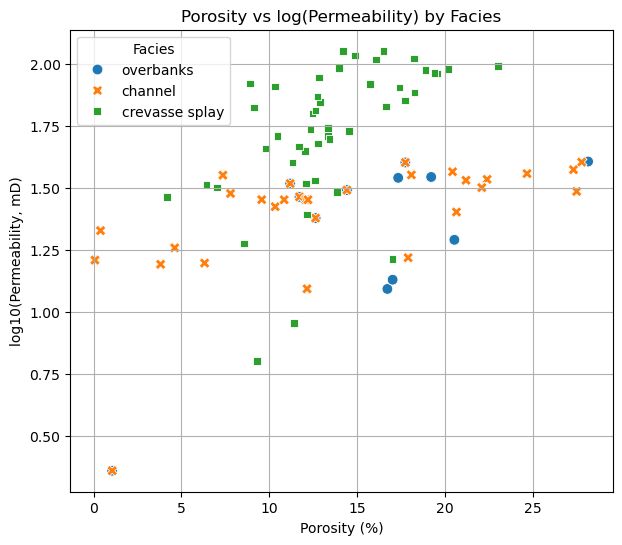

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="Porosity (%)",
    y="logK",
    hue="Facies",
    style="Facies",
    palette="tab10",
    s=60
)
plt.title("Porosity vs log(Permeability) by Facies")
plt.xlabel("Porosity (%)")
plt.ylabel("log10(Permeability, mD)")
plt.grid(True)
plt.show()


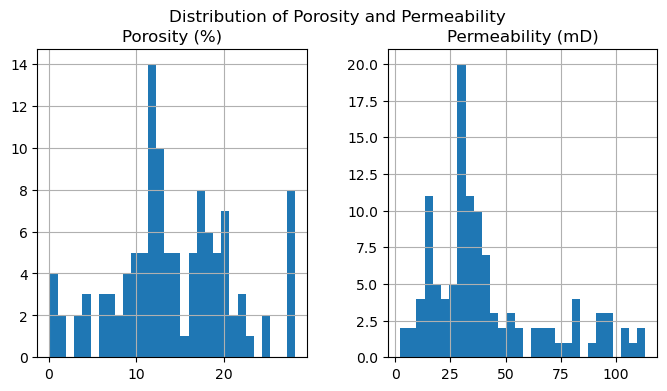

In [10]:
df[["Porosity (%)", "Permeability (mD)"]].hist(bins=30, figsize=(8,4))
plt.suptitle("Distribution of Porosity and Permeability")
plt.show()


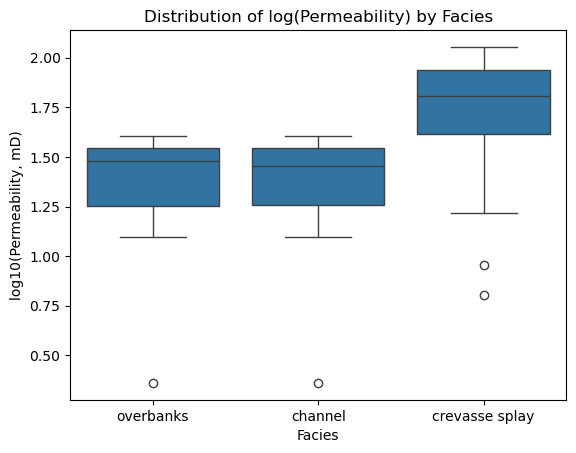

In [11]:
sns.boxplot(data=df, x="Facies", y="logK")
plt.title("Distribution of log(Permeability) by Facies")
plt.xlabel("Facies")
plt.ylabel("log10(Permeability, mD)")
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression

X = df[["Porosity (%)"]].values
y = df["logK"].values

model = LinearRegression()
model.fit(X, y)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))


Slope: 0.01625086645136593
Intercept: 1.2922884295061603
R² Score: 0.12593435883938842


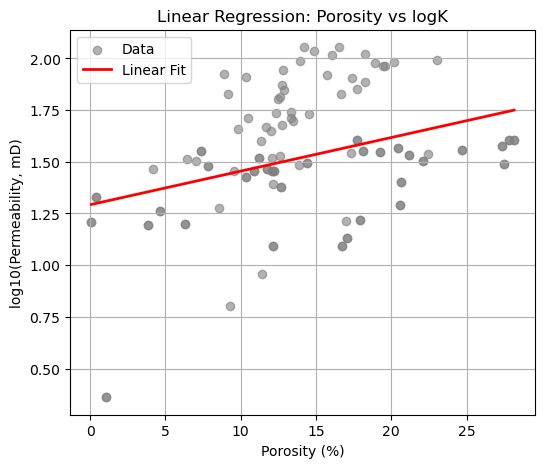

In [13]:
phi_grid = np.linspace(df["Porosity (%)"].min(), df["Porosity (%)"].max(), 100).reshape(-1,1)
logk_pred = model.predict(phi_grid)

plt.figure(figsize=(6,5))
plt.scatter(df["Porosity (%)"], df["logK"], color="gray", alpha=0.6, label="Data")
plt.plot(phi_grid, logk_pred, color="red", linewidth=2, label="Linear Fit")
plt.xlabel("Porosity (%)")
plt.ylabel("log10(Permeability, mD)")
plt.title("Linear Regression: Porosity vs logK")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df["Cluster"].value_counts()


Cluster
0    54
1    44
2    17
Name: count, dtype: int64

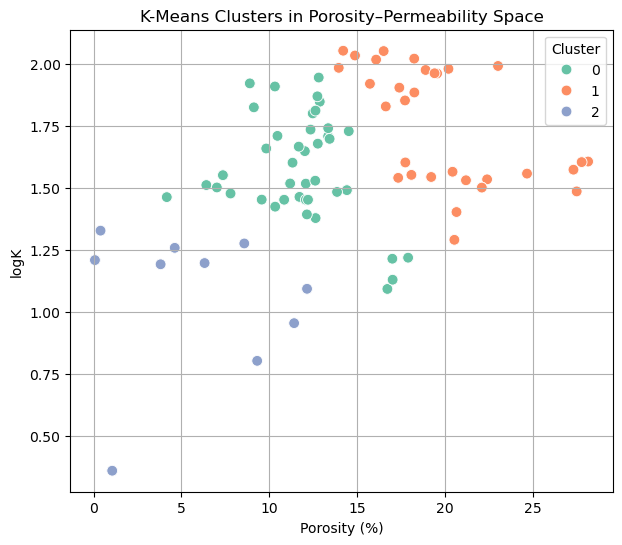

In [16]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x="Porosity (%)", y="logK", hue="Cluster", palette="Set2", s=60)
plt.title("K-Means Clusters in Porosity–Permeability Space")
plt.grid(True)
plt.show()


In [17]:
df.groupby("Cluster")[["Porosity (%)", "Permeability (mD)", "logK"]].mean()


,Porosity (%),Permeability (mD),logK
Cluster,,,
0,11.976915,38.318844,1.533975
1,20.721361,55.669500,1.685890
2,5.074772,14.000674,1.078128


In [18]:
df.to_csv("../data/poro_perm_cleaned.csv", index=False)
print("✅ Cleaned data saved successfully!")


✅ Cleaned data saved successfully!


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

X = df[["Porosity (%)", "logK"]].values
y = df["Facies"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

       channel       0.64      0.64      0.64        11
crevasse splay       0.58      0.78      0.67         9
     overbanks       0.00      0.00      0.00         3

      accuracy                           0.61        23
     macro avg       0.41      0.47      0.43        23
  weighted avg       0.53      0.61      0.57        23



D:\SAAD COMPUTER\ana\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\SAAD COMPUTER\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SAAD COMPUTER\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SAAD COMPUTER\ana\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being 

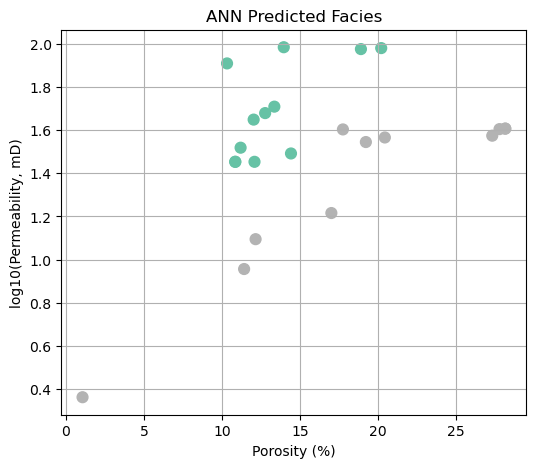

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(X_test[:,0], X_test[:,1], c=pd.factorize(y_pred)[0], cmap="Set2", s=60, label="Predicted")
plt.xlabel("Porosity (%)")
plt.ylabel("log10(Permeability, mD)")
plt.title("ANN Predicted Facies")
plt.grid(True)
plt.show()


In [22]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [25]:
import os
os.listdir("../data/well_logs")


['.gitkeep']

In [26]:
import os
os.listdir("../data")


['images', 'poro_perm_cleaned.csv', 'poro_perm_data.csv', 'well_logs']

In [28]:
import os
print("Current working directory:", os.getcwd())
print("Folders here:", os.listdir())


Current working directory: D:\Projects\pete219-data-analytics-group-project\notebooks
Folders here: ['.ipynb_checkpoints', '01_data_cleaning.ipynb', 'note']


In [29]:
import os
print(os.listdir("../"))


['.git', '.ipynb_checkpoints', '.virtual_documents', 'anaconda_projects', 'data', 'notebooks', 'README.md', 'report', 'Untitled.ipynb']


In [30]:
import os
print(os.listdir("../data"))


['images', 'poro_perm_cleaned.csv', 'poro_perm_data.csv', 'well_logs']


In [31]:
import os
print(os.listdir("../data/well_logs"))


['.gitkeep']


In [33]:
import os
print(os.listdir("../data/well_logs"))


['.gitkeep', '1051661161.las']


In [34]:
import os
print(os.listdir("../data/well_logs"))


['.gitkeep', '1051661161.las']


In [35]:
las = lasio.read("../data/well_logs/1051661161.las")
df = las.df().reset_index().rename(columns={"DEPT": "Depth"})
df.head()


,Depth,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,...,MCAL,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR
0,195.0,0.0,0.0,50.1033,26.8228,34.0239,34.0239,36.6129,67.9772,-59.66,...,5.4417,-0.0402,-1.4576,0.0,187.5248,98.9567,4.4815,2.3568,0.0004,20.6567
1,195.5,0.0,0.0,50.0399,22.3549,30.5510,30.5510,33.0634,66.6325,-59.66,...,5.4386,-0.0450,-1.4576,0.0,187.4460,98.9010,4.4861,2.3609,0.0041,20.4146
2,196.0,0.0,0.0,49.9584,20.3087,29.0076,29.0076,31.5179,70.3524,-59.41,...,5.4420,-0.0509,-1.4580,0.0,187.4191,98.8820,4.4849,2.3600,0.0053,20.4690
3,196.5,0.0,0.0,49.7387,23.4421,31.4152,31.4152,33.9631,72.3127,-59.41,...,5.4435,-0.0533,-1.4597,0.0,187.5659,98.9858,4.4806,2.3548,0.0043,20.7699
4,197.0,0.0,0.0,49.3747,28.0807,35.0576,35.0576,37.5494,66.9943,-59.29,...,5.4349,-0.0536,-1.4620,1.0,187.9458,99.2545,4.4776,2.3481,0.0026,21.1618


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   5541 non-null   float64
 1   AVTX    5541 non-null   float64
 2   BVTX    5541 non-null   float64
 3   CILD    5540 non-null   float64
 4   CNDL    5466 non-null   float64
 5   CNLS    5466 non-null   float64
 6   CNPOR   5466 non-null   float64
 7   CNSS    5467 non-null   float64
 8   GR      5452 non-null   float64
 9   LSPD    5541 non-null   float64
 10  LTEN    5541 non-null   float64
 11  RILD    5541 non-null   float64
 12  RILM    5537 non-null   float64
 13  RLL3    5519 non-null   float64
 14  RXORT   5541 non-null   float64
 15  SP      5541 non-null   float64
 16  MCAL    5509 non-null   float64
 17  MI      5512 non-null   float64
 18  MN      5512 non-null   float64
 19  ITT     5541 non-null   float64
 20  DT      5541 non-null   float64
 21  SPOR    5540 non-null   float64
 22  

In [37]:
# Select key logs for analysis
logs = df[["Depth", "GR", "RHOB", "CNPOR", "RILD"]].copy()

# Check missing values and basic stats
print(logs.isna().sum())
logs.describe()


Depth     0
GR       89
RHOB     44
CNPOR    75
RILD      0
dtype: int64


,Depth,GR,RHOB,CNPOR,RILD
count,5541.000000,5452.000000,5497.000000,5466.000000,5541.000000
mean,1580.000000,226.288636,38.845337,25.780431,194.807430
std,799.846626,3578.021831,1907.225020,9.751341,4244.224408
min,195.000000,-58.279600,-2.556100,-41.596500,1.483200
25%,887.500000,67.104700,2.385200,20.364025,5.451700
50%,1580.000000,101.855900,2.464800,28.280950,8.446100
75%,2272.500000,124.645475,2.562000,32.052275,12.738100
max,2965.000000,100000.000000,100000.000000,250.748200,100000.000000


In [38]:
import numpy as np

# Replace impossible or negative readings with NaN
logs.loc[logs["GR"] < 0, "GR"] = np.nan
logs.loc[logs["RHOB"] < 1.0, "RHOB"] = np.nan
logs.loc[logs["CNPOR"] < 0, "CNPOR"] = np.nan
logs.loc[logs["RILD"] <= 0, "RILD"] = np.nan

# Sort by depth and interpolate to fill small gaps
logs = logs.sort_values("Depth")
logs[["GR", "RHOB", "CNPOR", "RILD"]] = logs[["GR", "RHOB", "CNPOR", "RILD"]].interpolate()

logs.head()


,Depth,GR,RHOB,CNPOR,RILD
0,195.0,67.9772,2.3568,34.0239,19.9588
1,195.5,66.6325,2.3609,30.5510,19.9841
2,196.0,70.3524,2.3600,29.0076,20.0167
3,196.5,72.3127,2.3548,31.4152,20.1051
4,197.0,66.9943,2.3481,35.0576,20.2533


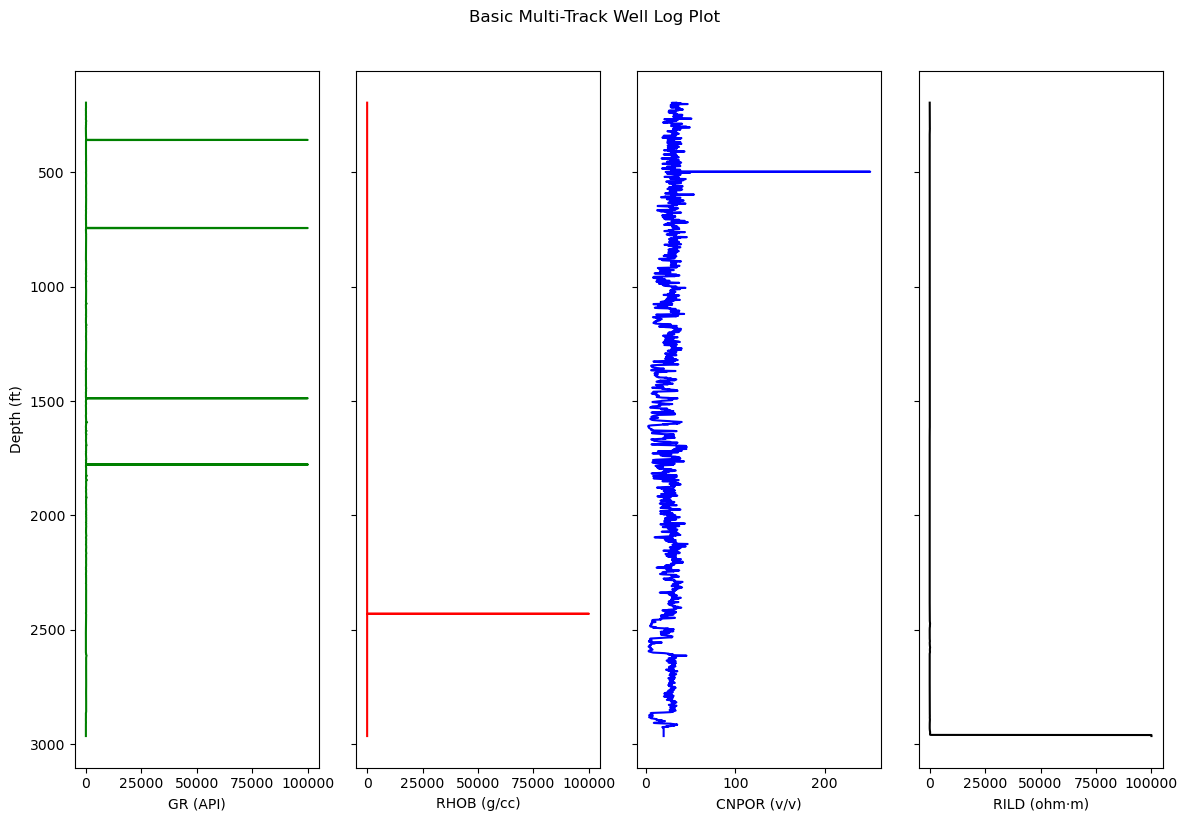

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,8), sharey=True)

axes[0].plot(logs["GR"], logs["Depth"], color="green")
axes[0].set_xlabel("GR (API)")
axes[0].invert_yaxis()
axes[0].set_ylabel("Depth (ft)")

axes[1].plot(logs["RHOB"], logs["Depth"], color="red")
axes[1].set_xlabel("RHOB (g/cc)")

axes[2].plot(logs["CNPOR"], logs["Depth"], color="blue")
axes[2].set_xlabel("CNPOR (v/v)")

axes[3].plot(logs["RILD"], logs["Depth"], color="black")
axes[3].set_xlabel("RILD (ohm·m)")

plt.suptitle("Basic Multi-Track Well Log Plot", y=1.02)
plt.tight_layout()
plt.show()


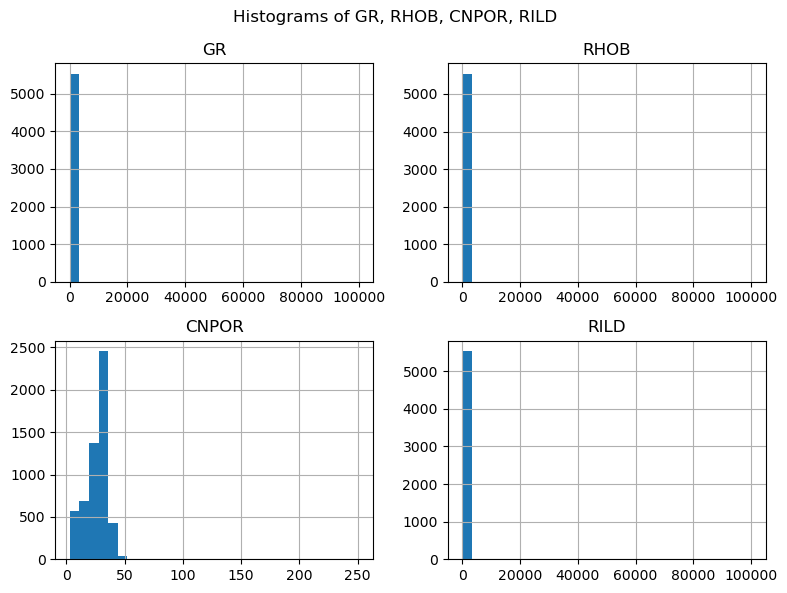

In [41]:
logs[["GR", "RHOB", "CNPOR", "RILD"]].hist(bins=30, figsize=(8,6))
plt.suptitle("Histograms of GR, RHOB, CNPOR, RILD")
plt.tight_layout()
plt.show()


In [42]:
# Define clean and shale GR from percentiles
GR_clean = logs["GR"].quantile(0.10)
GR_shale = logs["GR"].quantile(0.90)

# Compute Vshale and clip between 0–1
logs["VSH"] = (logs["GR"] - GR_clean) / (GR_shale - GR_clean)
logs["VSH"] = logs["VSH"].clip(0, 1)

# Define net reservoir cutoff (VSH < 0.4)
logs["NET"] = logs["VSH"] < 0.4

# Compute thickness values
depth_step = logs["Depth"].diff().median()
net_thickness = logs.loc[logs["NET"], "Depth"].count() * depth_step
gross_thickness = logs["Depth"].iloc[-1] - logs["Depth"].iloc[0]
ntg = net_thickness / gross_thickness

net_thickness, gross_thickness, ntg


(np.float64(910.5), np.float64(2770.0), np.float64(0.32870036101083033))

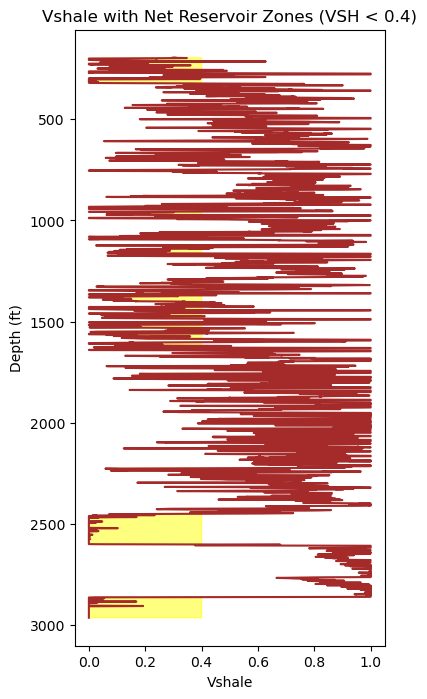

In [43]:
plt.figure(figsize=(4,8))
plt.plot(logs["VSH"], logs["Depth"], color="brown")
plt.fill_betweenx(logs["Depth"], logs["VSH"], 0.4, where=logs["VSH"]<0.4, color="yellow", alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel("Vshale")
plt.ylabel("Depth (ft)")
plt.title("Vshale with Net Reservoir Zones (VSH < 0.4)")
plt.show()


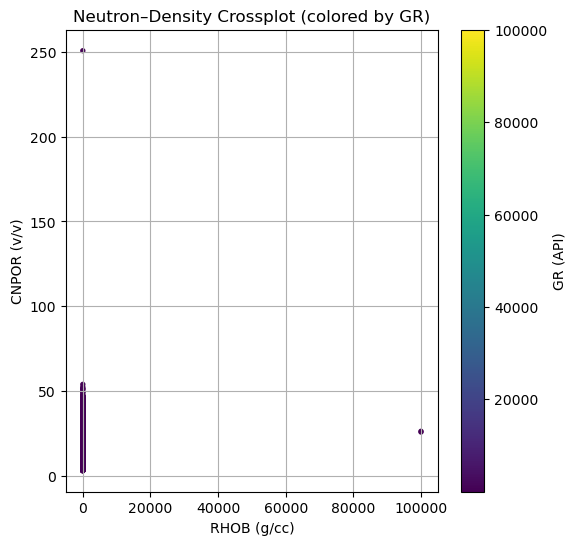

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(logs["RHOB"], logs["CNPOR"], c=logs["GR"], cmap="viridis", s=8)
plt.xlabel("RHOB (g/cc)")
plt.ylabel("CNPOR (v/v)")
plt.title("Neutron–Density Crossplot (colored by GR)")
cbar = plt.colorbar()
cbar.set_label("GR (API)")
plt.grid(True)
plt.show()


In [45]:
corr = logs[["GR", "RHOB", "CNPOR", "RILD", "VSH"]].corr()
print(corr)


             GR      RHOB     CNPOR      RILD       VSH
GR     1.000000 -0.000786  0.026335 -0.002503  0.059508
RHOB  -0.000786  1.000000  0.000435 -0.000815 -0.009456
CNPOR  0.026335  0.000435  1.000000 -0.027892  0.527995
RILD  -0.002503 -0.000815 -0.027892  1.000000 -0.073561
VSH    0.059508 -0.009456  0.527995 -0.073561  1.000000


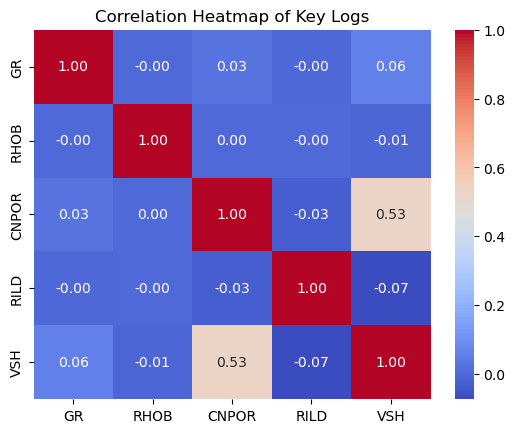

In [46]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Logs")
plt.show()


In [47]:
# Define simple cutoffs
gr_cutoff = 60
rild_cutoff = logs["RILD"].median()

# Flag potential reservoir intervals
logs["ReservoirZone"] = (logs["GR"] < gr_cutoff) & (logs["RILD"] > rild_cutoff)

# Show how many intervals qualify
logs["ReservoirZone"].value_counts()


ReservoirZone
False    4484
True     1057
Name: count, dtype: int64

In [48]:
# Define simple cutoffs
gr_cutoff = 60
rild_cutoff = logs["RILD"].median()

# Flag potential reservoir intervals
logs["ReservoirZone"] = (logs["GR"] < gr_cutoff) & (logs["RILD"] > rild_cutoff)

# Show how many intervals qualify
logs["ReservoirZone"].value_counts()


ReservoirZone
False    4484
True     1057
Name: count, dtype: int64

In [52]:
logs["RILD"].describe()


count      5541.000000
mean        194.807430
std        4244.224408
min           1.483200
25%           5.451700
50%           8.446100
75%          12.738100
max      100000.000000
Name: RILD, dtype: float64

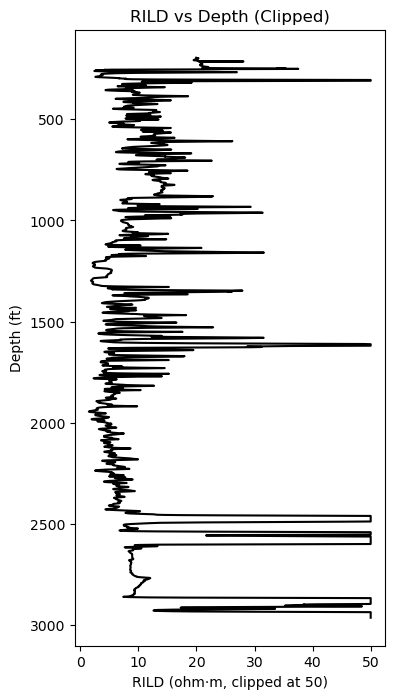

In [53]:
# Make a clipped version of RILD for plotting
logs["RILD_clip"] = logs["RILD"].clip(upper=50)

plt.figure(figsize=(4,8))
plt.plot(logs["RILD_clip"], logs["Depth"], color="black")
plt.gca().invert_yaxis()
plt.xlabel("RILD (ohm·m, clipped at 50)")
plt.ylabel("Depth (ft)")
plt.title("RILD vs Depth (Clipped)")
plt.show()


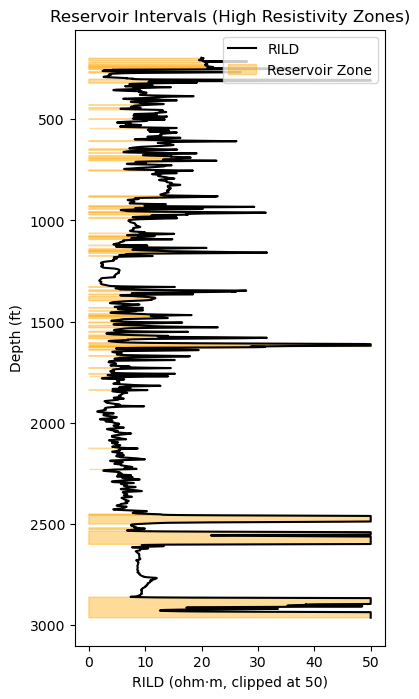

In [54]:
plt.figure(figsize=(4,8))
plt.plot(logs["RILD_clip"], logs["Depth"], color="black", label="RILD")
plt.fill_betweenx(
    logs["Depth"],
    0,
    logs["RILD_clip"],
    where=logs["ReservoirZone"],
    color="orange",
    alpha=0.4,
    label="Reservoir Zone"
)
plt.gca().invert_yaxis()
plt.xlabel("RILD (ohm·m, clipped at 50)")
plt.ylabel("Depth (ft)")
plt.title("Reservoir Intervals (High Resistivity Zones)")
plt.legend()
plt.show()


In [55]:
logs.groupby("ReservoirZone")[["GR", "RHOB", "CNPOR", "RILD", "VSH"]].mean()


,GR,RHOB,CNPOR,RILD,VSH
ReservoirZone,,,,,
False,266.857259,47.042680,28.073972,7.937892,0.670179
True,37.832165,2.655275,15.855520,987.544430,0.061426


In [56]:
logs.to_csv("../data/well_logs/1051661161_processed.csv", index=False)
print("✅ Processed well log data saved successfully!")


✅ Processed well log data saved successfully!


In [57]:
import os
print(os.listdir("../data/images"))


['.gitkeep']


In [62]:
import os, shutil
from skimage import io
import matplotlib.pyplot as plt

# find any .tif in ../data
candidates = [f for f in os.listdir("../data") if f.lower().endswith((".tif", ".tiff"))]
print("Found in ../data:", candidates)

# move the first one to images
if candidates:
    src = "../data/" + candidates[0]
    dst = "../data/images/" + candidates[0]
    shutil.move(src, dst)
    print("Moved:", src, "->", dst)

    # load and show
    img = io.imread(dst, as_gray=True)
    plt.imshow(img, cmap="gray")
    plt.title(candidates[0])
    plt.axis("off")
    plt.show()
else:
    print("No .tif found in ../data. If it is elsewhere, tell me the folder.")


Found in ../data: []
No .tif found in ../data. If it is elsewhere, tell me the folder.


['.gitkeep', 'berea8bit.tif']


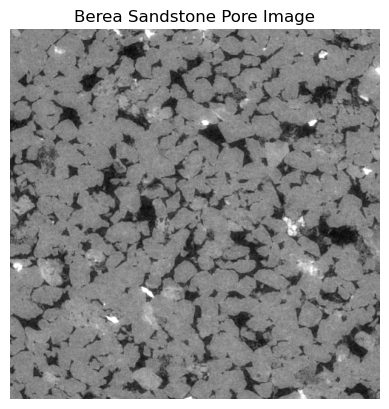

In [63]:
import os
from skimage import io
import matplotlib.pyplot as plt

print(os.listdir("../data/images"))

img = io.imread("../data/images/berea8bit.tif", as_gray=True)
plt.imshow(img, cmap="gray")
plt.title("Berea Sandstone Pore Image")
plt.axis("off")
plt.show()


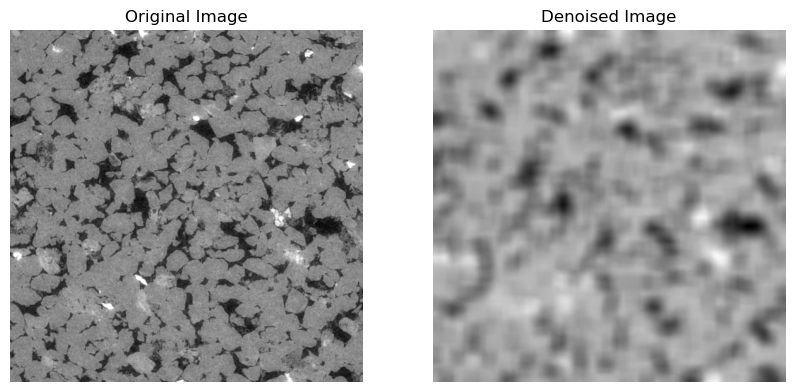

In [64]:
from skimage.restoration import denoise_nl_means, estimate_sigma
import numpy as np
import matplotlib.pyplot as plt

# Estimate noise level
sigma_est = np.mean(estimate_sigma(img, channel_axis=None))

# Apply Non-Local Means filter
denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True)

# Show before and after
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(denoised, cmap="gray")
axes[1].set_title("Denoised Image")
axes[1].axis("off")

plt.show()


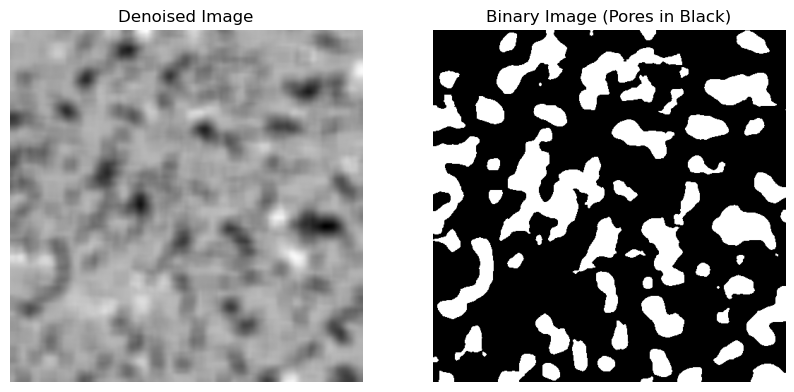

In [65]:
from skimage import filters

# Compute global threshold using Otsu’s method
threshold = filters.threshold_otsu(denoised)

# Create binary image
binary = denoised < threshold

# Display
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(denoised, cmap="gray")
axes[0].set_title("Denoised Image")
axes[0].axis("off")

axes[1].imshow(binary, cmap="gray")
axes[1].set_title("Binary Image (Pores in Black)")
axes[1].axis("off")

plt.show()


In [66]:
pore_pixels = binary.sum()
total_pixels = binary.size
phi_2d = pore_pixels / total_pixels

print(f"Estimated 2D porosity: {phi_2d*100:.2f}%")


Estimated 2D porosity: 28.63%


Pores counted: 57
Area stats (px): mean 1255.12  median 766.0


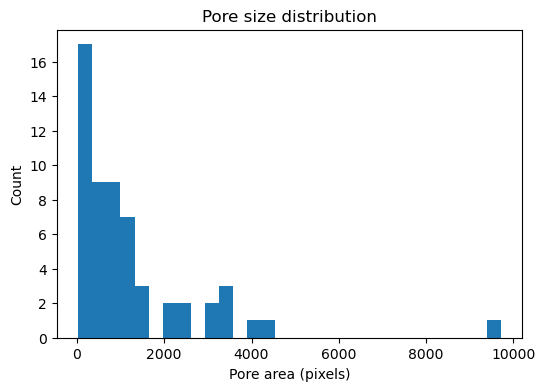

In [67]:
from skimage import measure, morphology

# remove tiny specks (tune min_size if needed)
clean = morphology.remove_small_objects(binary, min_size=25)

# label pores and measure areas (in pixels)
labels = measure.label(clean)
props = measure.regionprops(labels)

pore_areas = np.array([p.area for p in props])
print("Pores counted:", len(pore_areas))
print("Area stats (px): mean", pore_areas.mean().round(2), " median", np.median(pore_areas).round(2))

plt.figure(figsize=(6,4))
plt.hist(pore_areas, bins=30)
plt.xlabel("Pore area (pixels)")
plt.ylabel("Count")
plt.title("Pore size distribution")
plt.show()


In [68]:
# mean pore diameter (approx.)
mean_diameter = np.sqrt((4 * pore_areas.mean()) / np.pi)

# Kozeny–Carman (relative estimate)
# k ≈ (phi^3 * d^2) / (180 * (1 - phi)^2)
k_est = ((phi_2d ** 3) * (mean_diameter ** 2)) / (180 * (1 - phi_2d) ** 2)

print(f"Estimated relative permeability: {k_est:.2f} (arbitrary units)")


Estimated relative permeability: 0.41 (arbitrary units)


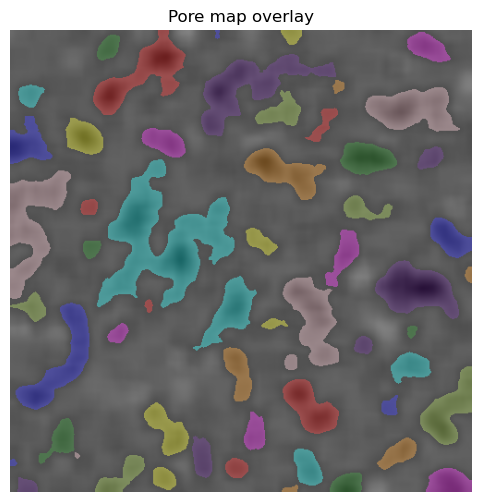

In [69]:
from skimage import measure, color

# outline labeled pores on denoised image
overlay = color.label2rgb(labels, image=denoised, alpha=0.3, bg_label=0)

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title("Pore map overlay")
plt.axis("off")
plt.show()


In [71]:
plt.imsave("../report/pore_map_overlay.png", overlay)
pd.Series(pore_areas).to_csv("../report/pore_areas_px.csv", index=False)
with open("../report/pore_summary.txt","w") as f:
    f.write(f"2D porosity: {phi_2d*100:.2f}%\n")
    f.write(f"Pores counted: {len(pore_areas)}\n")
    f.write(f"Mean area (px): {pore_areas.mean():.2f}\n")
    f.write(f"Median area (px): {np.median(pore_areas):.2f}\n")
    f.write(f"Relative permeability (KC): {k_est:.3f}\n")


In [76]:
plt.imsave("../report/berea_denoised.png", denoised, cmap="gray")
plt.imsave("../report/berea_binary.png", binary, cmap="gray")


In [77]:
import pandas as pd
summary = pd.DataFrame({
    "Metric": [
        "2D porosity (%)",
        "Pores counted (n)",
        "Mean pore area (px)",
        "Median pore area (px)",
        "Relative permeability (KC units)"
    ],
    "Value": [
        round(phi_2d*100, 2),
        int(len(pore_areas)),
        round(pore_areas.mean(), 2),
        round(np.median(pore_areas), 2),
        round(k_est, 3)
    ]
})
summary


,Metric,Value
0,2D porosity (%),28.630
1,Pores counted (n),57.000
2,Mean pore area (px),1255.120
3,Median pore area (px),766.000
4,Relative permeability (KC units),0.409


In [78]:
summary.to_csv("../report/image_analysis_summary.csv", index=False)
print("Saved: ../report/image_analysis_summary.csv")


Saved: ../report/image_analysis_summary.csv
